## Import File Image

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import h5py

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
h5_path = 'C:/Users/siang/MMU/Pattern Recognition/project/HDF5/image_data.h5'

X_train = []
y_train = []
X_test = []
y_test = []
X_valid = []
y_valid = []

In [3]:
def segment_background(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, segmented_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    return segmented_image

In [4]:
def preprocess_image(h5_path, size=(50, 50)):
    with h5py.File(h5_path, 'r') as h5_file:
        for split in ['train', 'test' , 'valid']:
            split_group = h5_file[split]
            for category in split_group.keys():
                category_group = split_group[category]
                print(category)
                if category != ".ipynb_checkpoints":
                    label = int(category) 
                for image_name in category_group.keys():
                    image_data = category_group[image_name][()]
                    resized_image = cv2.resize(image_data, size)
                    if split == 'train':
                        X_train.append(resized_image)
                        y_train.append(label)
                    elif split == 'test':
                        X_test.append(resized_image)
                        y_test.append(label)
                    elif split == 'valid':
                        X_valid.append(resized_image)
                        y_valid.append(label)

    return image_data, resized_image, label

In [5]:
def visualize_before_after(original, resized, title):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(f'{title} - Original')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(resized, cmap='gray')
    plt.title(f'{title} - Resized')
    plt.axis('off')
    plt.show()

0
1
2
3
0
1
2
3
0
1
2
3


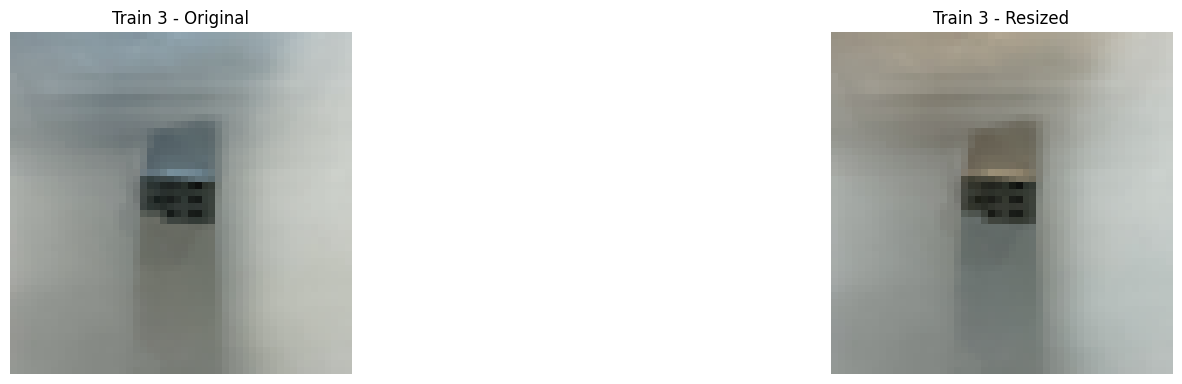

In [6]:
original, resized, label = preprocess_image(h5_path)
visualize_before_after(original, resized, f'Train {label}')

In [7]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")

X_train shape: (744, 50, 50, 3)
y_train shape: (744,)
X_test shape: (248, 50, 50, 3)
y_test shape: (248,)
X_valid shape: (248, 50, 50, 3)
y_valid shape: (248,)


In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_valid_flat = X_valid.reshape(X_test.shape[0], -1)

In [9]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## LDA Preprocessing

In [10]:
lda = LinearDiscriminantAnalysis(n_components=3)

In [11]:
lda.fit(X_train_flat, y_train)
X_train_lda = lda.transform(X_train_flat)
X_test_lda = lda.transform(X_test_flat)
X_valid_lda = lda.transform(X_valid_flat)

## Model Training

### KNN

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

def perform_grid_search(model, param_grid, X_train, y_train, cv=5, scoring='accuracy', verbose=1, n_jobs=-1):

    # Initialize the GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               cv=cv, scoring=scoring, verbose=verbose, n_jobs=n_jobs)
    
    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator and best parameters
    best_estimator = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    print(f"Best Parameters: {best_params}")
    return best_estimator, best_params

# Define the model
#Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
model =  KNeighborsClassifier()

# Define the parameter grid for SVM
param_grid = {
    
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
   
}

# Perform grid search
knn_best_model, best_hyperparams = perform_grid_search(model, param_grid, X_train_lda, y_train)

# Evaluate the best model on the test set
y_pred = knn_best_model.predict(X_test_lda)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [13]:
knn = knn_best_model

knn.fit(X_train_lda, y_train)

train_pred_knn = knn.predict(X_train_lda)
test_pred_knn = knn.predict(X_test_lda)
valid_pred_knn = knn.predict(X_valid_lda)

train_accuracy_knn = accuracy_score(y_train, train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, test_pred_knn)
valid_accuracy_knn = accuracy_score(y_valid, valid_pred_knn)

print("KNN Training Accuracy: {:.2f}%".format(train_accuracy_knn * 100))
print("KNN Testing Accuracy: {:.2f}%".format(test_accuracy_knn * 100))
print("KNN Validation Accuracy: {:.2f}%".format(valid_accuracy_knn * 100))

print("Classification Report: \n", classification_report(y_test, test_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred_knn))

KNN Training Accuracy: 100.00%
KNN Testing Accuracy: 88.71%
KNN Validation Accuracy: 82.26%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        62
           1       0.94      0.81      0.87        62
           2       0.85      0.90      0.88        62
           3       0.79      0.94      0.86        62

    accuracy                           0.89       248
   macro avg       0.90      0.89      0.89       248
weighted avg       0.90      0.89      0.89       248

Confusion Matrix:
 [[56  0  3  3]
 [ 0 50  3  9]
 [ 0  3 56  3]
 [ 0  0  4 58]]


### SVM

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def perform_grid_search(model, param_grid, X_train, y_train, cv=5, scoring='accuracy', verbose=1, n_jobs=-1):

    # Initialize the GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               cv=cv, scoring=scoring, verbose=verbose, n_jobs=n_jobs)
    
    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator and best parameters
    best_estimator = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    print(f"Best Parameters: {best_params}")
    return best_estimator, best_params
    
# Define the model
#Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
model = SVC()

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
   
}

# Perform grid search
svm_best_model, best_hyperparams = perform_grid_search(model, param_grid, X_train_lda, y_train)

# Evaluate the best model on the test set
y_pred = svm_best_model.predict(X_test_lda)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [15]:
 import pandas as pd

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the SVM classifier
svm = svm_best_model
svm.fit(X_train_lda, y_train)

# Predict on the test set
svm_train_pred = svm.predict(X_train_lda)
svm_test_pred = svm.predict(X_test_lda)
svm_valid_pred = svm.predict(X_valid_lda)


# Evaluate the classifier
svm_train_accuracy = accuracy_score(y_train, svm_train_pred)
svm_test_accuracy = accuracy_score(y_test, svm_test_pred)
svm_valid_accuracy = accuracy_score(y_valid, svm_valid_pred)


print("SVM Training Accuracy: {:.2f}%".format(svm_train_accuracy * 100))
print("SVM Testing Accuracy: {:.2f}%".format(svm_test_accuracy * 100))
print("SVM Validation Accuracy: {:.2f}%".format(svm_valid_accuracy * 100))
print("Classification Report: \n", classification_report(y_test, svm_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_test_pred))


SVM Training Accuracy: 100.00%
SVM Testing Accuracy: 89.52%
SVM Validation Accuracy: 81.85%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        62
           1       0.95      0.87      0.91        62
           2       0.85      0.90      0.88        62
           3       0.81      0.92      0.86        62

    accuracy                           0.90       248
   macro avg       0.90      0.90      0.90       248
weighted avg       0.90      0.90      0.90       248

Confusion Matrix:
 [[55  0  3  4]
 [ 0 54  2  6]
 [ 0  3 56  3]
 [ 0  0  5 57]]


### Random Forest

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

def perform_grid_search(model, param_grid, X_train, y_train, cv=5, scoring='accuracy', verbose=1, n_jobs=-1):
 
    # Initialize the GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               cv=cv, scoring=scoring, verbose=verbose, n_jobs=n_jobs)
    
    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator and best parameters
    best_estimator = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    print(f"Best Parameters: {best_params}")
    return best_estimator, best_params

# Define the model
model = RandomForestClassifier()

# Define the parameter grid for SVM
param_grid = {
    'n_estimators': [10,50,100],
    'max_depth': [None,10,30,50],
    'min_samples_split': [2,5,10],

   
}

# Perform grid search
rf_best_model, best_hyperparams = perform_grid_search(model, param_grid, X_train_lda, y_train)

# Evaluate the best model on the test set
y_pred = rf_best_model.predict(X_test_lda)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}


In [17]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Naive Bayes classifier
#Best Parameters: {'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
rf_model = rf_best_model
rf_model.fit(X_train_lda, y_train)

rf_train_pred = rf_model.predict(X_train_lda)
rf_test_pred = rf_model.predict(X_test_lda)
rf_valid_pred = rf_model.predict(X_valid_lda)



rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
rf_valid_accuracy = accuracy_score(y_valid, rf_valid_pred)


print("Random Forest Training Accuracy: {:.2f}%".format(rf_train_accuracy * 100))
print("Random Forest Testing Accuracy: {:.2f}%".format(rf_test_accuracy * 100))
print("Random Forest Validation Accuracy: {:.2f}%".format(rf_valid_accuracy * 100))
print("Classification Report: \n", classification_report(y_test, rf_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_test_pred))


Random Forest Training Accuracy: 100.00%
Random Forest Testing Accuracy: 87.90%
Random Forest Validation Accuracy: 79.03%
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.87      0.92        62
           1       0.94      0.81      0.87        62
           2       0.79      0.92      0.85        62
           3       0.85      0.92      0.88        62

    accuracy                           0.88       248
   macro avg       0.89      0.88      0.88       248
weighted avg       0.89      0.88      0.88       248

Confusion Matrix:
 [[54  0  3  5]
 [ 1 50  7  4]
 [ 1  3 57  1]
 [ 0  0  5 57]]


### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

def perform_grid_search(model, param_grid, X_train, y_train, cv=5, scoring='accuracy', verbose=1, n_jobs=-1):
 
    # Initialize the GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               cv=cv, scoring=scoring, verbose=verbose, n_jobs=n_jobs)
    
    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator and best parameters
    best_estimator = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    print(f"Best Parameters: {best_params}")
    return best_estimator, best_params

# Define the model
model = DecisionTreeClassifier()

# Define the parameter grid for SVM
param_grid = {

    'max_depth': [10, 30, 50],
    'min_samples_split': [2, 5, 10],


   
}

# Perform grid search
dt_best_model, best_hyperparams = perform_grid_search(model, param_grid, X_train_lda, y_train)

# Evaluate the best model on the test set
y_pred = dt_best_model.predict(X_test_lda)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2}


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Initialize and train the Naive Bayes classifier
dt_model = dt_best_model
dt_model.fit(X_train_lda, y_train)

dt_train_pred = dt_model.predict(X_train_lda)
dt_test_pred = dt_model.predict(X_test_lda)
dt_valid_pred = dt_model.predict(X_valid_lda)



dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
dt_valid_accuracy = accuracy_score(y_valid, dt_valid_pred)


print("Decision Tree Training Accuracy: {:.2f}%".format(dt_train_accuracy * 100))
print("Decision Tree  Testing Accuracy: {:.2f}%".format(dt_test_accuracy * 100))
print("Decision Tree  Validation Accuracy: {:.2f}%".format(dt_valid_accuracy * 100))
print("Classification Report: \n", classification_report(y_test, dt_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_test_pred))

Decision Tree Training Accuracy: 100.00%
Decision Tree  Testing Accuracy: 82.66%
Decision Tree  Validation Accuracy: 73.39%
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.90      0.83        62
           1       0.89      0.77      0.83        62
           2       0.79      0.84      0.81        62
           3       0.89      0.79      0.84        62

    accuracy                           0.83       248
   macro avg       0.83      0.83      0.83       248
weighted avg       0.83      0.83      0.83       248

Confusion Matrix:
 [[56  0  1  5]
 [10 48  3  1]
 [ 7  3 52  0]
 [ 0  3 10 49]]


## Comparison

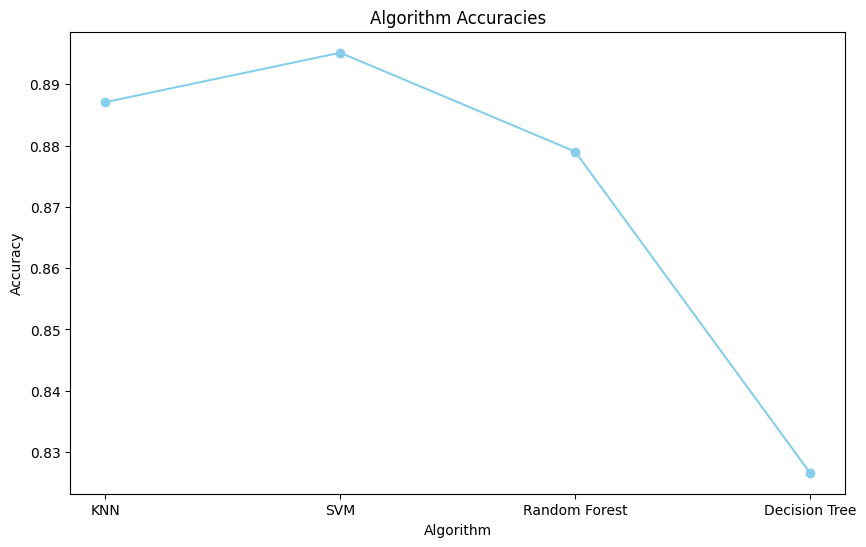

In [20]:
import matplotlib.pyplot as plt


# Data
algorithms = ['KNN','SVM','Random Forest','Decision Tree' ]
accuracies = [test_accuracy_knn , svm_test_accuracy , rf_test_accuracy, dt_test_accuracy]

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(algorithms, accuracies, marker='o', linestyle='-', color='skyblue')

# Add title and labels
plt.title('Algorithm Accuracies')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')

# Display the plot
plt.show()
